Dependecies

In [1]:
library(mice)
library(norm)
library(ggplot2)
library(psych)
library(lavaan)


Attaching package: ‘mice’


The following object is masked from ‘package:stats’:

    filter


The following objects are masked from ‘package:base’:

    cbind, rbind


This package has some major limitations
(for example, it does not work reliably when
the number of variables exceeds 30),
and has been superseded by the norm2 package.


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


This is lavaan 0.6-11
lavaan is FREE software! Please report any bugs.


Attaching package: ‘lavaan’


The following object is masked from ‘package:psych’:

    cor2cov




# Dataset
Load and examine the dataset

In [2]:
# Note: data have been manually cleaned somewhat;
# tabs have been coverted to spaces for consistency
raw_data = read.table('pain.dat', sep=' ', header=TRUE, na.strings='.')
raw_data$female = raw_data$female == 1
raw_data$severity = factor(raw_data$severity, levels=1:6, ordered=TRUE)
summary(raw_data)

   female           depress         phydisab       psydisab     severity 
 Mode :logical   Min.   :1.100   Min.   : 5.0   Min.   : 4.80   1   :29  
 FALSE:130       1st Qu.:3.100   1st Qu.: 8.3   1st Qu.: 9.70   2   :30  
 TRUE :180       Median :3.900   Median : 9.9   Median :10.90   3   :43  
                 Mean   :3.792   Mean   :10.0   Mean   :10.95   4   :72  
                 3rd Qu.:4.400   3rd Qu.:11.7   3rd Qu.:12.30   5   :90  
                 Max.   :6.900   Max.   :16.2   Max.   :17.00   6   :30  
                 NA's   :67      NA's   :9      NA's   :4       NA's:16  
      age    
 Min.   : 7  
 1st Qu.:36  
 Median :46  
 Mean   :44  
 3rd Qu.:52  
 Max.   :74  
             

In [3]:
raw_data

female,depress,phydisab,psydisab,severity,age
<lgl>,<dbl>,<dbl>,<dbl>,<ord>,<int>
FALSE,4.5,12.6,9.8,2,44
FALSE,3.2,10.2,10.9,4,52
FALSE,1.8,8.2,10.9,3,35
FALSE,5.7,9.9,9.0,5,7
FALSE,3.9,6.4,9.6,2,34
FALSE,2.2,12.4,12.0,2,43
FALSE,4.4,11.6,9.2,4,26
FALSE,4.9,11.0,11.2,6,51
FALSE,5.2,7.8,10.3,4,33


Get an overview of the missingness pattern

In [4]:
missing_rates = colSums(is.na(raw_data)) / nrow(raw_data)
print(missing_rates)

    female    depress   phydisab   psydisab   severity        age 
0.00000000 0.21612903 0.02903226 0.01290323 0.05161290 0.00000000 


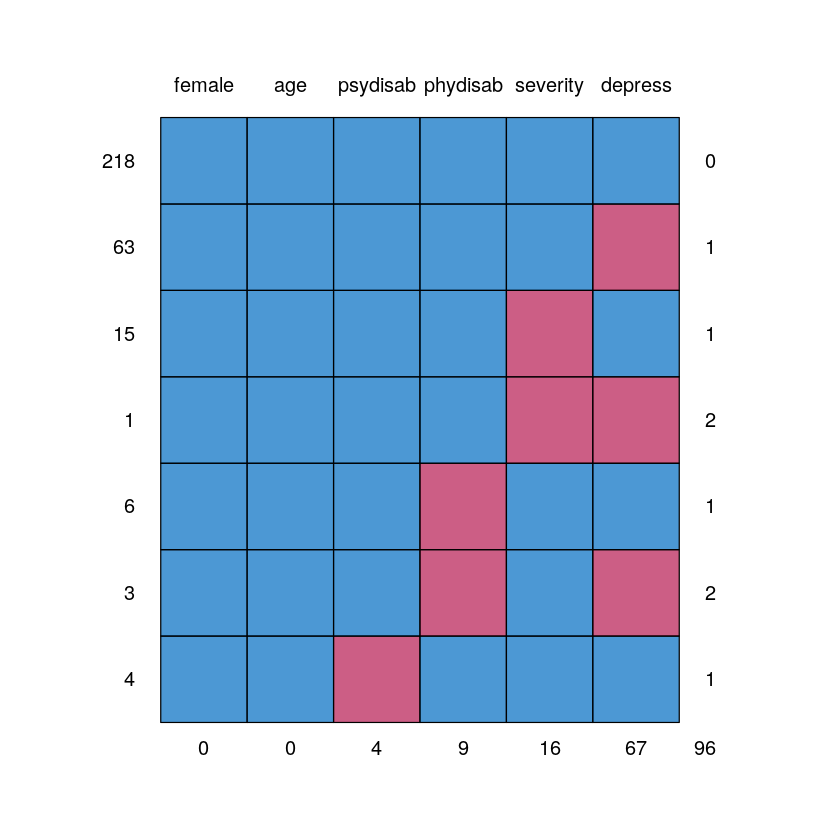

In [5]:
tmp = md.pattern(raw_data)

In order to see which variables we should consider as covariates, we plot the correlations of all of the variables

Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphic

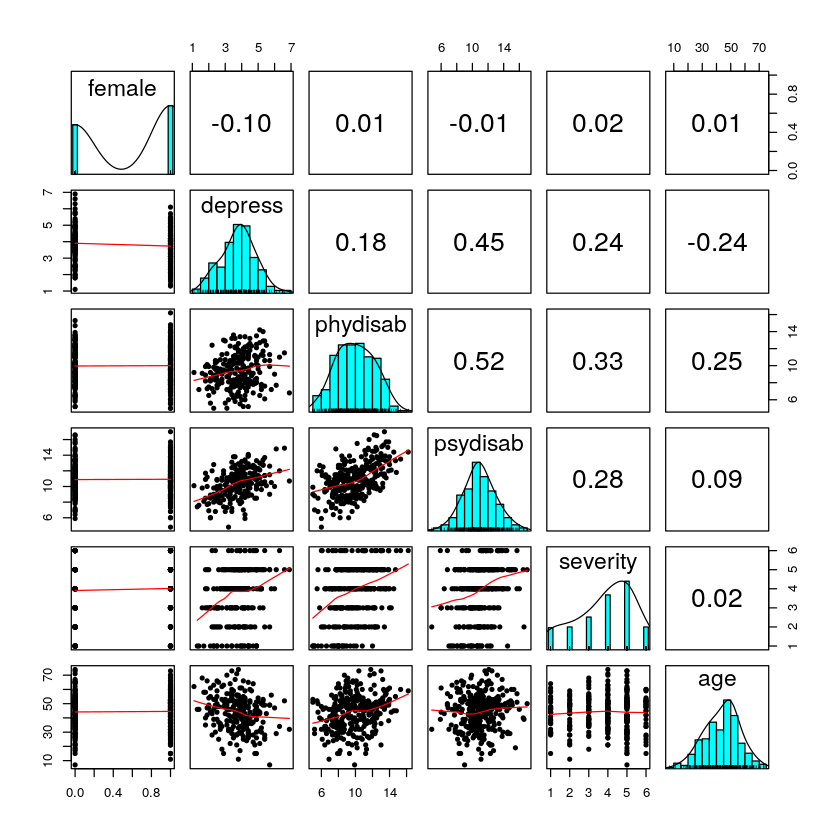

In [6]:
pairs.panels(raw_data,ellipses=FALSE)

In [7]:
regression_formula = '
# We suspect depression is influenced by physical and pyschological
# disabilities
depress ~ phydisab + psydisab
# Based on the plot above, we observe the following covariences
phydisab ~~ psydisab
phydisab ~~ severity
psydisab ~~ severity
phydisab ~~ age
'
regression_formula = depress ~ phydisab + psydisab + severity + age

# Helper Functions
## General
These can be used on any of the datasets

In [8]:
build_linear_model = function(data) {
    with(data, lm(
        #depress ~ phydisab + psydisab
        depress ~ phydisab + psydisab + severity + age
    ))
}

In [9]:
plot_residuals = function(model, multiple_datasets=FALSE,
                         append=FALSE, colour='black') {
    
    if (multiple_datasets) {
        residual_val = NULL
        predicted_val = NULL
        for (i in 1:num_imputed_datasets) {
            residual_val = rbind(residual_val,residuals(model$analyses[[i]]))
            model_residuals = colMeans(residual_val)

            predicted_val = rbind(predicted_val,predict(model$analyses[[i]]))
            model_predictions = colMeans(predicted_val)
        }
        
    } else {
        model_residuals = model$residuals
        model_predictions = model$predictions
    }
    
    if (append) {
        points(model_residuals,model_predictions,xlab='residuals',ylab='predictions',col=colour)
    } else {
        plot(model_residuals,model_predictions,xlab='residuals',ylab='predictions',col=colour)
    }
}

## Listwise Deletion

In [10]:
count_na = function(x) sum(is.na(x))
listwise_deletion = function(data) {
    completeness_mask = apply(data, 1, count_na) == 0
    return(subset(data, completeness_mask))
}

## Multiple Imputation

In [11]:
num_imputed_datasets = 20
num_entries = nrow(raw_data)
CONTINUOUS_COLS = c('depress','phydisab','psydisab','age')

summarize_pooled_results = function(mi_results,
        summary_cols=CONTINUOUS_COLS, mr=missing_rates,
        m=num_imputed_datasets, n=num_entries,
        precision=3) {
    imputed_datasets = complete(mi_results, 'all')

    # Compute the means for each dataset...
    imputed_means = sapply(imputed_datasets, function(dataset) {
        apply(dataset[summary_cols],2,mean)
    })
    
    # ...then combine them...
    grand_means = apply(imputed_means,1,mean)
    
    # ...and compute summary statistics
    
    std_err = sapply(imputed_datasets, function(dataset) {
        apply(dataset[summary_cols],2,sd) / sqrt(n)
    })
    
    within_impute_var = apply(std_err^2,1,mean)
    
    btw_impute_var = rep(NA,length(summary_cols))
    names(btw_impute_var) = names(within_impute_var)

    for (j in 1:nrow(imputed_means)) {
        btw_impute_var[j] = sum((imputed_means[j,] -
            grand_means[j])^2 / (m - 1))
    }

    total_var = within_impute_var + btw_impute_var +
        btw_impute_var / m
    total_std_err = sqrt(total_var)
    
    fmi = (btw_impute_var + btw_impute_var/m) / total_std_err
    
    pooled_stats = round(data.frame(
        mean=grand_means,Vw=within_impute_var,Vb=btw_impute_var,
        SE=total_std_err,Vt=total_var,FMI=fmi,MR=mr[summary_cols]),precision)
    
    return(pooled_stats)
}

## Maximum Likelihood Estimation

In [12]:
# Initialize psuedo-random number generator in a reasonably
# unpredictable way
set.seed(as.numeric(Sys.time()))

In [13]:
v = c(1,-1,5,-8,4)
print(sign(v)*v)
sign(v)*sqrt(sign(v)*v)

[1] 1 1 5 8 4


[1]  1.000000 -1.000000  2.236068 -2.828427  2.000000

In [14]:
# Estimate mean, standard deviation, covariance matrix, and correlation
em = function(data, cols=NULL) {
    if (is.null(cols)) {
        cols = names(data)
    }
    
    summary = prelim.norm(data.matrix(data[cols]))
    results_vec = em.norm(summary, showits=FALSE)
    return(getparam.norm(summary, results_vec, corr=TRUE))
}

get_covariance = function(em_results) {
    std_dev = diag(em_results$sdv)
    return(std_dev %*% em_results$r %*% std_dev)
}

get_std_error = function(covariance, indep_col, num_cases) {
    y_variance = covariance[indep_col,]
    #x_covariance = covariance[-indep_col,-indep_col]
    
    sqr_err = diag(y_variance*solve(covariance))
    std_err = sqrt(abs(sqr_err)/num_cases)
    return (std_err)
}

# Estimate regression coeffecients, based on example in Likelihood.R
coeff_em = function(data, em_results, indep_col, predictor_cols=NULL,
        offset=0) {
    if (is.null(predictor_cols)) {
        predictor_cols = data[-indep_col]
    }
    
    covariance = get_covariance(em_results)
    
    covariance_dep = covariance[predictor_cols, predictor_cols]
    covariance_mixed = covariance[predictor_cols, indep_col]
    coeffs = solve(covariance_dep) %*% covariance_mixed
    
    intercept = em_results$mu[indep_col] -
        sum(coeffs * em_results$mu[predictor_cols])
    coeffs = rbind(c(intercept), coeffs)
    
    rownames(coeffs) = append(c('(Intercept)'),
        colnames(data)[offset+predictor_cols])
    coeffs = data.frame(coeffs)
    
    coeffs$std_err = get_std_error(covariance, indep_col, nrow(data))
    
    return(coeffs)
}

# Analysis

## Full Data

Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphic

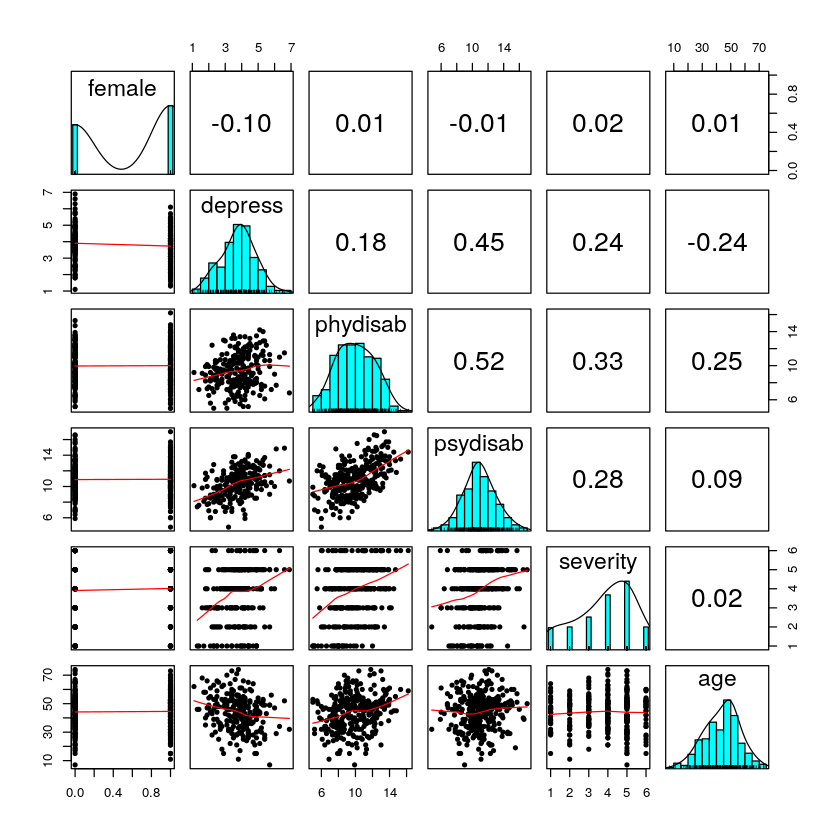

In [15]:
pairs.panels(raw_data,ellipses=FALSE)

### Model Building
#### Listwise Deletion

In [16]:
complete_case_data = listwise_deletion(raw_data)
summary(complete_case_data)

   female           depress         phydisab        psydisab     severity
 Mode :logical   Min.   :1.400   Min.   : 5.00   Min.   : 4.80   1:23    
 FALSE:96        1st Qu.:3.200   1st Qu.: 7.90   1st Qu.: 9.20   2:25    
 TRUE :122       Median :3.900   Median : 9.30   Median :10.60   3:38    
                 Mean   :3.811   Mean   : 9.35   Mean   :10.37   4:54    
                 3rd Qu.:4.400   3rd Qu.:10.80   3rd Qu.:11.40   5:63    
                 Max.   :6.900   Max.   :14.20   Max.   :14.90   6:15    
      age      
 Min.   : 7.0  
 1st Qu.:34.0  
 Median :43.5  
 Mean   :43.0  
 3rd Qu.:52.0  
 Max.   :74.0  

In [17]:
complete_case_model = build_linear_model(complete_case_data)
summary(complete_case_model)


Call:
lm(formula = depress ~ phydisab + psydisab + severity + age)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.38034 -0.55649  0.05219  0.56299  2.66337 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.998730   0.431173   4.636 6.26e-06 ***
phydisab     0.035347   0.034040   1.038   0.3003    
psydisab     0.227745   0.035763   6.368 1.20e-09 ***
severity.L   0.337230   0.191124   1.764   0.0791 .  
severity.Q   0.314770   0.182818   1.722   0.0866 .  
severity.C  -0.185843   0.160762  -1.156   0.2490    
severity^4  -0.127011   0.148037  -0.858   0.3919    
severity^5   0.122424   0.133539   0.917   0.3603    
age         -0.020510   0.004912  -4.175 4.37e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8642 on 209 degrees of freedom
Multiple R-squared:  0.2962,	Adjusted R-squared:  0.2693 
F-statistic:    11 on 8 and 209 DF,  p-value: 6.399e-13


#### Multiple Imputation

In [18]:
mi_data = mice(raw_data, m=num_imputed_datasets, maxit=20, seed=664,
    defaultMethod=c('norm.nob','logreg','lda','polr'))


 iter imp variable
  1   1  depress  phydisab  psydisab  severity
  1   2  depress  phydisab  psydisab  severity
  1   3  depress  phydisab  psydisab  severity
  1   4  depress  phydisab  psydisab  severity
  1   5  depress  phydisab  psydisab  severity
  1   6  depress  phydisab  psydisab  severity
  1   7  depress  phydisab  psydisab  severity
  1   8  depress  phydisab  psydisab  severity
  1   9  depress  phydisab  psydisab  severity
  1   10  depress  phydisab  psydisab  severity
  1   11  depress  phydisab  psydisab  severity
  1   12  depress  phydisab  psydisab  severity
  1   13  depress  phydisab  psydisab  severity
  1   14  depress  phydisab  psydisab  severity
  1   15  depress  phydisab  psydisab  severity
  1   16  depress  phydisab  psydisab  severity
  1   17  depress  phydisab  psydisab  severity
  1   18  depress  phydisab  psydisab  severity
  1   19  depress  phydisab  psydisab  severity
  1   20  depress  phydisab  psydisab  severity
  2   1  depress  phydisab  p

In [19]:
summarize_pooled_results(mi_data, precision=5)

,mean,Vw,Vb,SE,Vt,FMI,MR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
depress,3.96434,0.00386,0.00031,0.06473,0.00419,0.00508,0.21613
phydisab,9.98785,0.01606,0.00014,0.12729,0.01620,0.00114,0.02903
psydisab,10.93652,0.01383,0.00006,0.11790,0.01390,0.00056,0.01290
age,44.00000,0.48798,0.00000,0.69856,0.48798,0.00000,0.00000


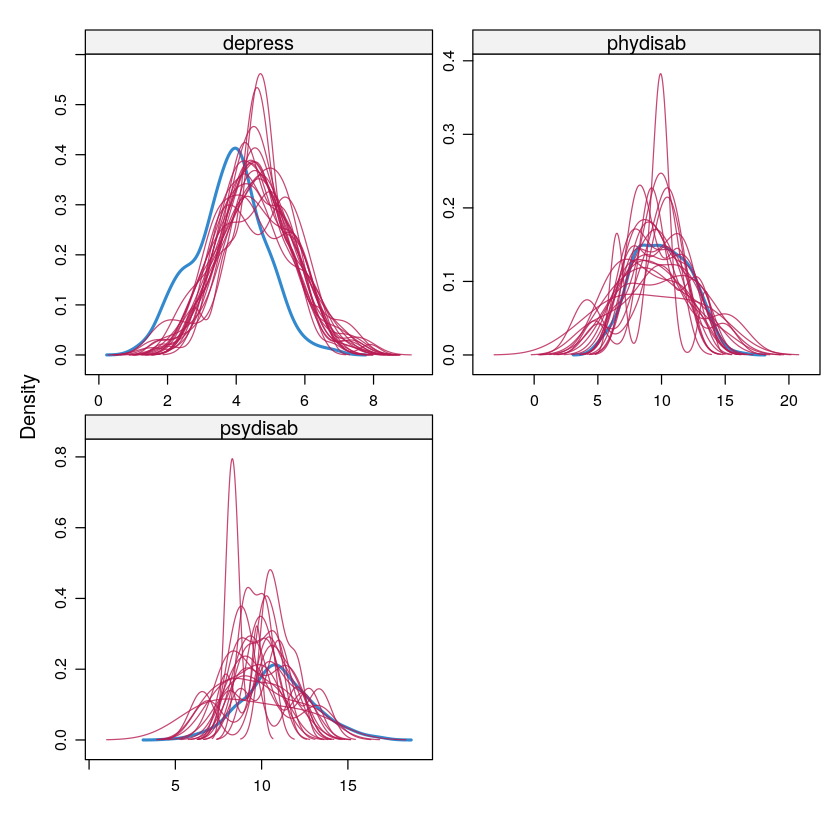

In [20]:
densityplot(mi_data)

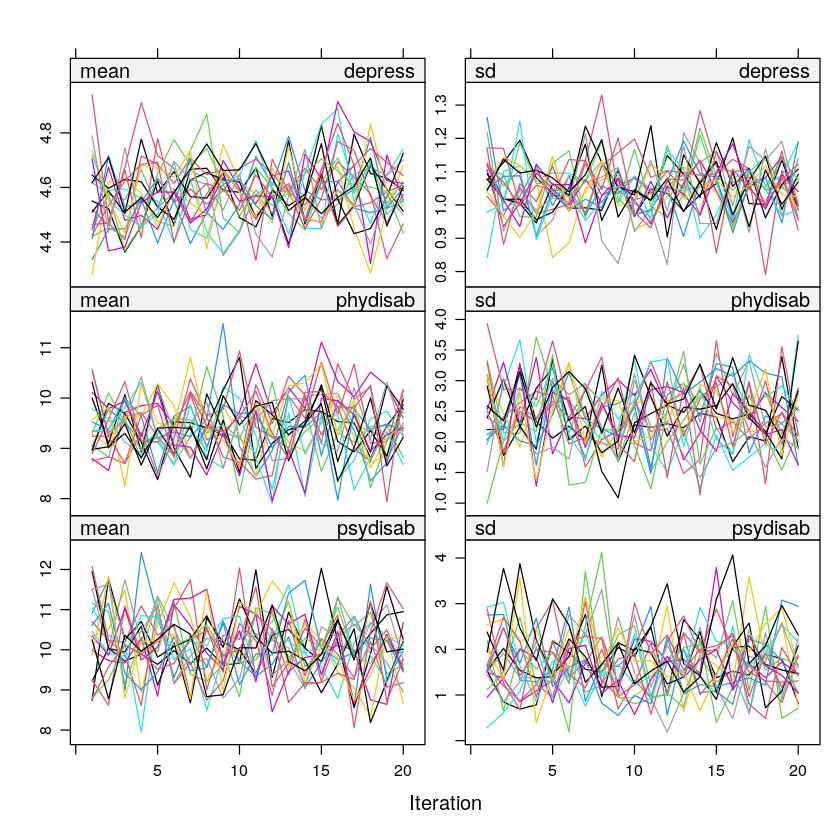

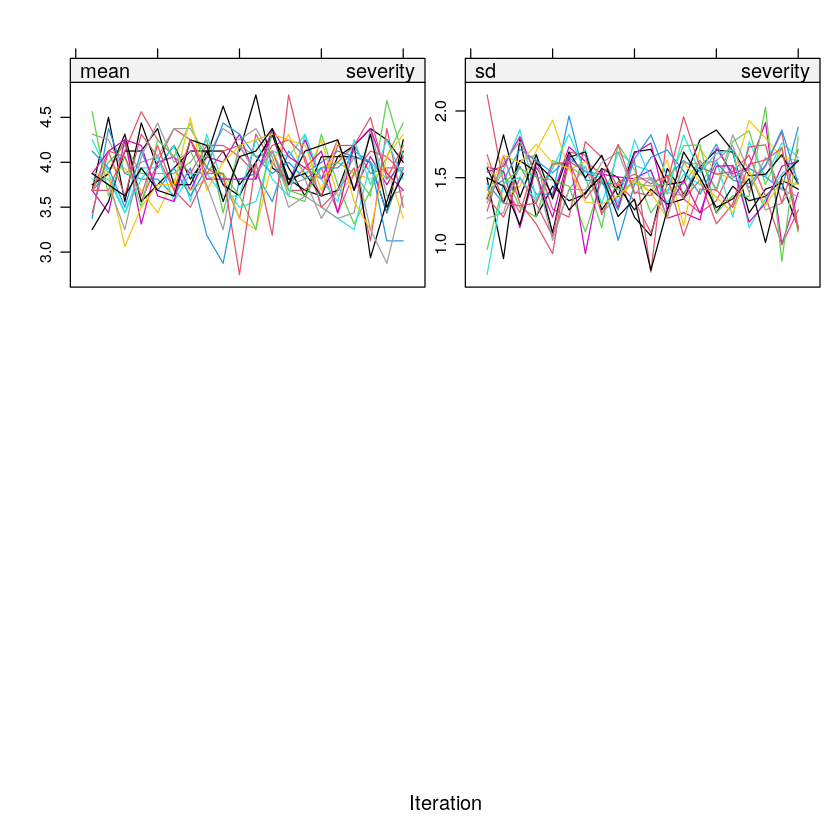

In [21]:
plot(mi_data)

In [22]:
mi_model = build_linear_model(mi_data)
summary(pool(mi_model))

term,estimate,std.error,statistic,df,p.value
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),1.91354816,0.360887460,5.3023404,164.78288,3.631562e-07
phydisab,0.04317350,0.030636649,1.4092110,185.65861,1.604455e-01
psydisab,0.23978853,0.031306129,7.6594757,178.97474,1.129541e-12
severity.L,0.40996024,0.168661208,2.4306730,216.23419,1.588585e-02
severity.Q,0.21697708,0.158964369,1.3649416,158.55938,1.742051e-01
severity.C,-0.14959548,0.164854561,-0.9074391,90.79018,3.665769e-01
severity^4,-0.10052562,0.140883760,-0.7135359,167.56606,4.765068e-01
severity^5,0.13504678,0.130917635,1.0315400,174.83031,3.037125e-01
age,-0.02365687,0.004575448,-5.1703950,189.37148,5.909514e-07


#### Maximum Likelihood Estimation

In [23]:
em_results = em(raw_data,
    cols=c('depress','phydisab','psydisab','severity','age'))
em_results

1.0000000,0.2966397,0.52056568,0.28861119,-0.20876228
0.2966397,1.0000000,0.52349136,0.33588927,0.25075107
0.5205657,0.5234914,1.00000000,0.27408933,0.08642906
0.2886112,0.3358893,0.27408933,1.00000000,0.01277475
-0.2087623,0.2507511,0.08642906,0.01277475,1.00000000


### Results
#### Listwise Deletion

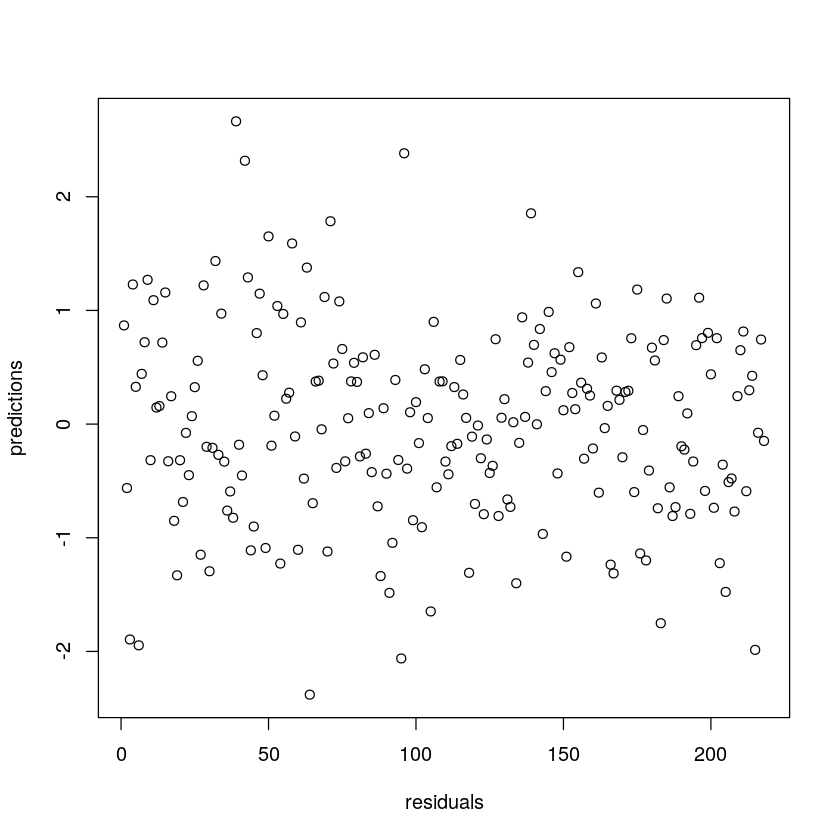

In [24]:
plot_residuals(complete_case_model)

#### Multiple Imputation

In [25]:
pool.r.squared(mi_model,adjusted=TRUE)

,est,lo 95,hi 95,fmi
adj R^2,0.3696368,0.2724912,0.4647413,0.2233393


In [26]:
tidy(pool(mi_model),conf.int=TRUE)

term,estimate,std.error,statistic,p.value,conf.low,conf.high,b,df,dfcom,fmi,lambda,m,riv,ubar
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
(Intercept),1.91354816,0.360887460,5.3023404,3.631562e-07,1.20098855,2.62610776,2.376354e-02,164.78288,301,0.2012194,0.1915829,20,0.2369852,1.052880e-01
phydisab,0.04317350,0.030636649,1.4092110,1.604455e-01,-0.01726721,0.10361422,1.453942e-04,185.65861,301,0.1715268,0.1626499,20,0.1942436,7.859404e-04
psydisab,0.23978853,0.031306129,7.6594757,1.129541e-12,0.17801192,0.30156514,1.601944e-04,178.97474,301,0.1807283,0.1716240,20,0.2071812,8.118696e-04
severity.L,0.40996024,0.168661208,2.4306730,1.588585e-02,0.07752976,0.74239071,3.355832e-03,216.23419,301,0.1318607,0.1238680,20,0.1413805,2.492298e-02
severity.Q,0.21697708,0.158964369,1.3649416,1.742051e-01,-0.09698364,0.53093780,4.832648e-03,158.55938,301,0.2106987,0.2008052,20,0.2512593,2.019539e-02
severity.C,-0.14959548,0.164854561,-0.9074391,3.665769e-01,-0.47706901,0.17787805,8.718299e-03,90.79018,301,0.3509779,0.3368365,20,0.5079238,1.802281e-02
severity^4,-0.10052562,0.140883760,-0.7135359,4.765068e-01,-0.37866148,0.17761024,3.545435e-03,167.56606,301,0.1970850,0.1875586,20,0.2308580,1.612553e-02
severity^5,0.13504678,0.130917635,1.0315400,3.037125e-01,-0.12333564,0.39342920,2.894364e-03,174.83031,301,0.1865677,0.1773153,20,0.2155325,1.410034e-02
age,-0.02365687,0.004575448,-5.1703950,5.909514e-07,-0.03268226,-0.01463148,3.145435e-06,189.37148,301,0.1665185,0.1577621,20,0.1873130,1.763202e-05


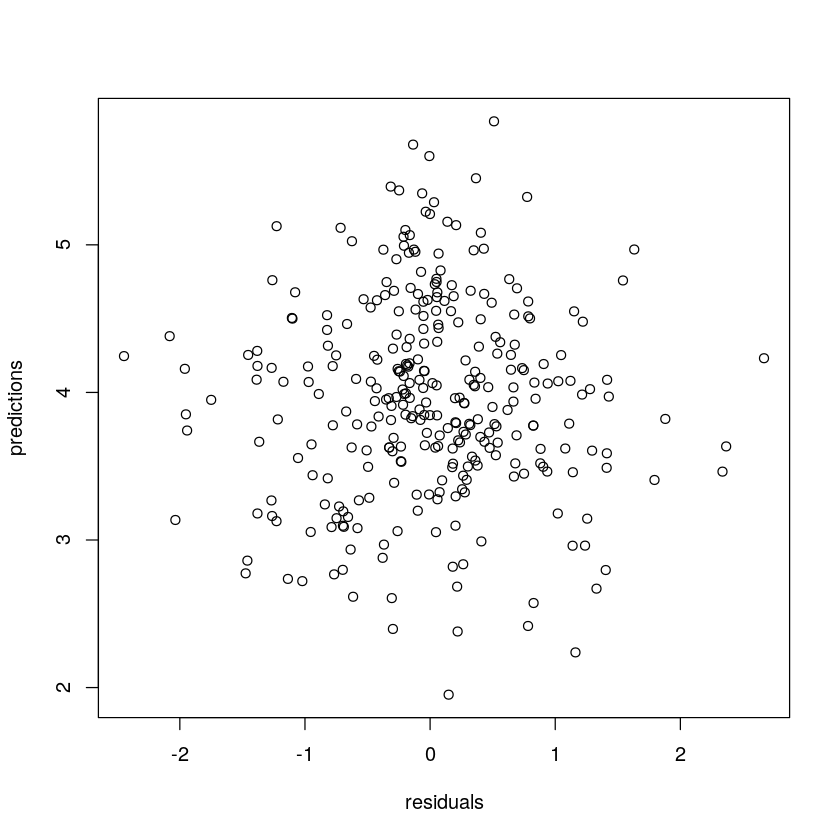

In [27]:
plot_residuals(mi_model, multiple_datasets=TRUE)

#### Maximum Likelihood Estimation

In [28]:
nrow(raw_data)

[1] 310

In [29]:
em_model_coeffs = coeff_em(raw_data, em_results, 1,
    predictor_cols=c(2,3,4,5),offset=1)
em_model_coeffs

,coeffs,std_err
,<dbl>,<dbl>
(Intercept),1.56516626,0.07107254
phydisab,0.03539487,0.02704878
psydisab,0.24563499,0.03921796
severity,0.10364162,0.02857538
age,-0.02381538,0.00841863


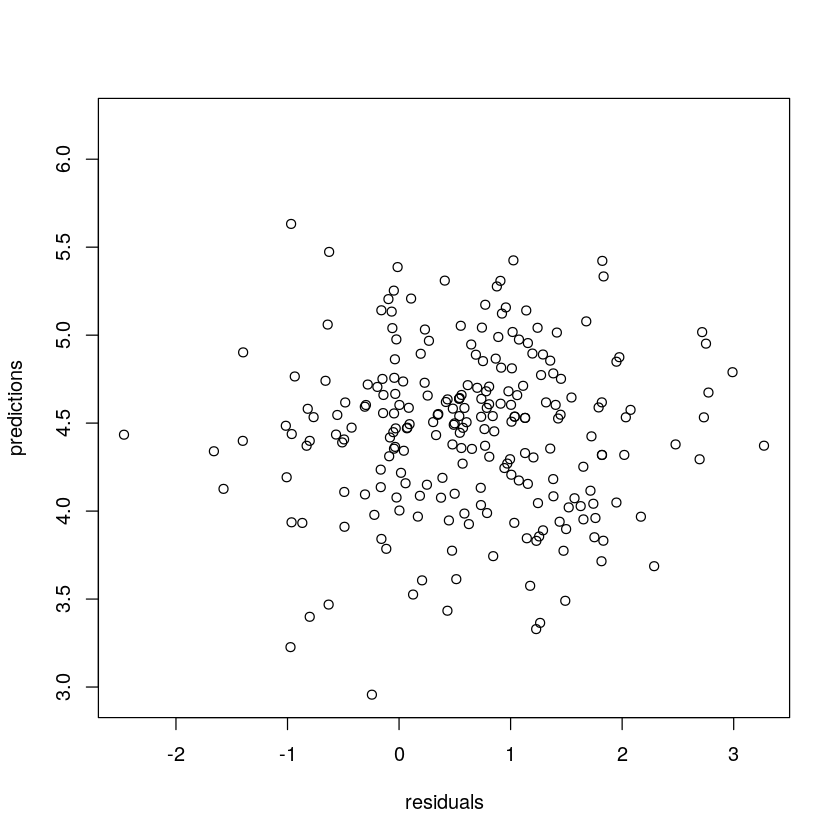

In [30]:
em_model_predictions = em_model_coeffs$coeffs[1] +
    em_model_coeffs$coeffs[2]*raw_data$phydisab +
    em_model_coeffs$coeffs[3]*raw_data$psydisab
em_model_residuals = em_model_predictions - raw_data$depress

plot(em_model_residuals,em_model_predictions,
     xlab='residuals',ylab='predictions')

## Stratification
Gender is suspected to modify associations, so let's try stratifying by those

In [31]:
# No need to record gender in gender-stratified data
raw_female_data = subset(raw_data,raw_data$female)[-1]
raw_male_data = subset(raw_data,!raw_data$female)[-1]

## Women Only

Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphic

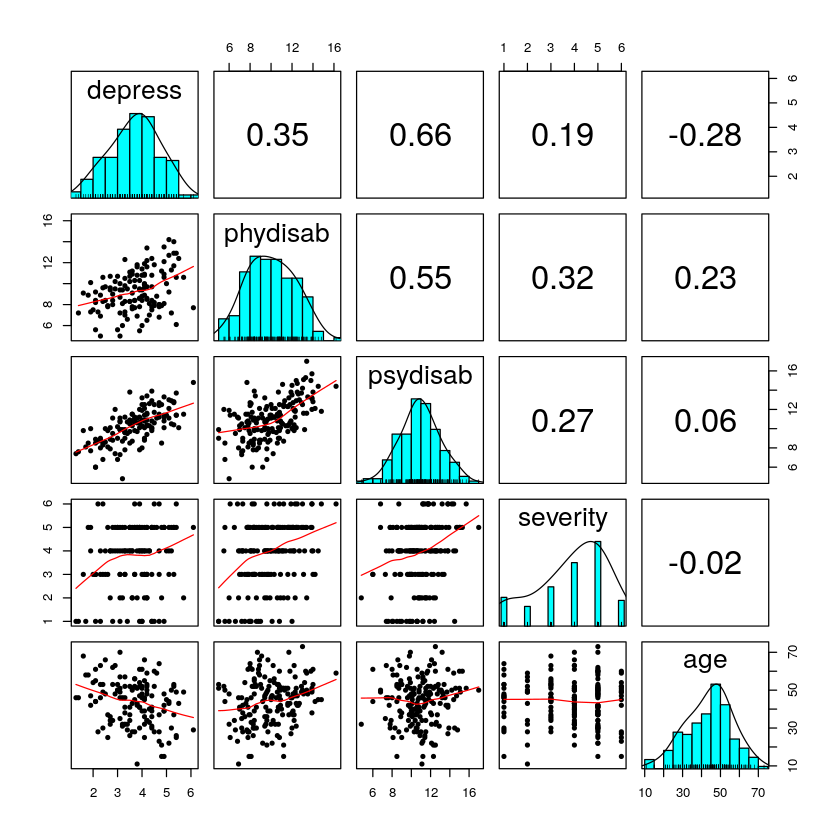

In [32]:
pairs.panels(raw_female_data,ellipses=FALSE)

### Model Building
#### Listwise Deletion

In [33]:
complete_case_female_data = listwise_deletion(raw_female_data)
summary(complete_case_female_data)

    depress        phydisab         psydisab     severity      age       
 Min.   :1.40   Min.   : 5.000   Min.   : 4.80   1:14     Min.   :11.00  
 1st Qu.:3.10   1st Qu.: 7.900   1st Qu.: 9.00   2:11     1st Qu.:34.00  
 Median :3.85   Median : 9.050   Median :10.45   3:23     Median :44.00  
 Mean   :3.73   Mean   : 9.135   Mean   :10.29   4:30     Mean   :42.93  
 3rd Qu.:4.40   3rd Qu.:10.450   3rd Qu.:11.40   5:38     3rd Qu.:52.00  
 Max.   :6.10   Max.   :14.200   Max.   :14.80   6: 6     Max.   :70.00  

In [34]:
complete_case_model = build_linear_model(complete_case_female_data)
summary(complete_case_model)


Call:
lm(formula = depress ~ phydisab + psydisab + severity + age)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.88824 -0.46838  0.03859  0.46905  1.48999 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.374640   0.486821   0.770  0.44316    
phydisab     0.107977   0.038733   2.788  0.00623 ** 
psydisab     0.313021   0.038156   8.204 4.15e-13 ***
severity.L   0.035102   0.222360   0.158  0.87485    
severity.Q   0.337261   0.214569   1.572  0.11879    
severity.C  -0.046703   0.186732  -0.250  0.80296    
severity^4  -0.190070   0.170236  -1.117  0.26657    
severity^5   0.067670   0.144690   0.468  0.64091    
age         -0.019017   0.005488  -3.465  0.00075 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6945 on 113 degrees of freedom
Multiple R-squared:  0.5287,	Adjusted R-squared:  0.4953 
F-statistic: 15.84 on 8 and 113 DF,  p-value: 1.806e-15


#### Multiple Imputation

In [35]:
mi_female_data = mice(raw_female_data, m=num_imputed_datasets, maxit=20, seed=664,
    defaultMethod=c('norm.nob','logreg','lda','polr'))


 iter imp variable
  1   1  depress  phydisab  psydisab  severity
  1   2  depress  phydisab  psydisab  severity
  1   3  depress  phydisab  psydisab  severity
  1   4  depress  phydisab  psydisab  severity
  1   5  depress  phydisab  psydisab  severity
  1   6  depress  phydisab  psydisab  severity
  1   7  depress  phydisab  psydisab  severity
  1   8  depress  phydisab  psydisab  severity
  1   9  depress  phydisab  psydisab  severity
  1   10  depress  phydisab  psydisab  severity
  1   11  depress  phydisab  psydisab  severity
  1   12  depress  phydisab  psydisab  severity
  1   13  depress  phydisab  psydisab  severity
  1   14  depress  phydisab  psydisab  severity
  1   15  depress  phydisab  psydisab  severity
  1   16  depress  phydisab  psydisab  severity
  1   17  depress  phydisab  psydisab  severity
  1   18  depress  phydisab  psydisab  severity
  1   19  depress  phydisab  psydisab  severity
  1   20  depress  phydisab  psydisab  severity
  2   1  depress  phydisab  p

In [36]:
summarize_pooled_results(mi_female_data, precision=5)

,mean,Vw,Vb,SE,Vt,FMI,MR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
depress,4.00106,0.00413,0.00054,0.06858,0.00470,0.00830,0.21613
phydisab,9.97183,0.01692,0.00041,0.13173,0.01735,0.00327,0.02903
psydisab,10.91831,0.01386,0.00021,0.11866,0.01408,0.00186,0.01290
age,44.13889,0.46566,0.00000,0.68239,0.46566,0.00000,0.00000


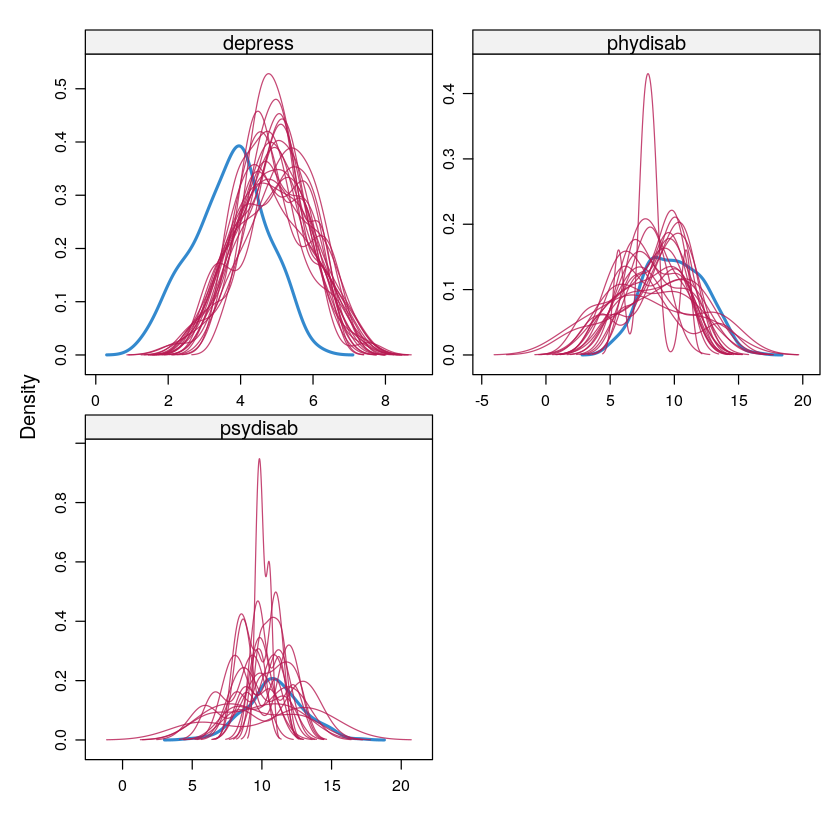

In [37]:
densityplot(mi_female_data)

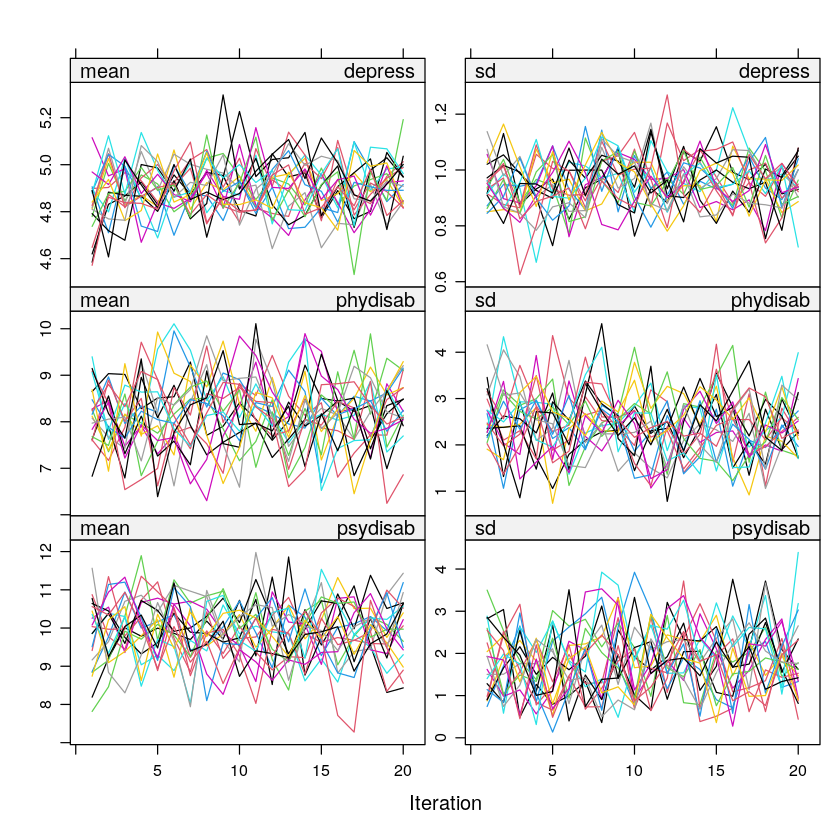

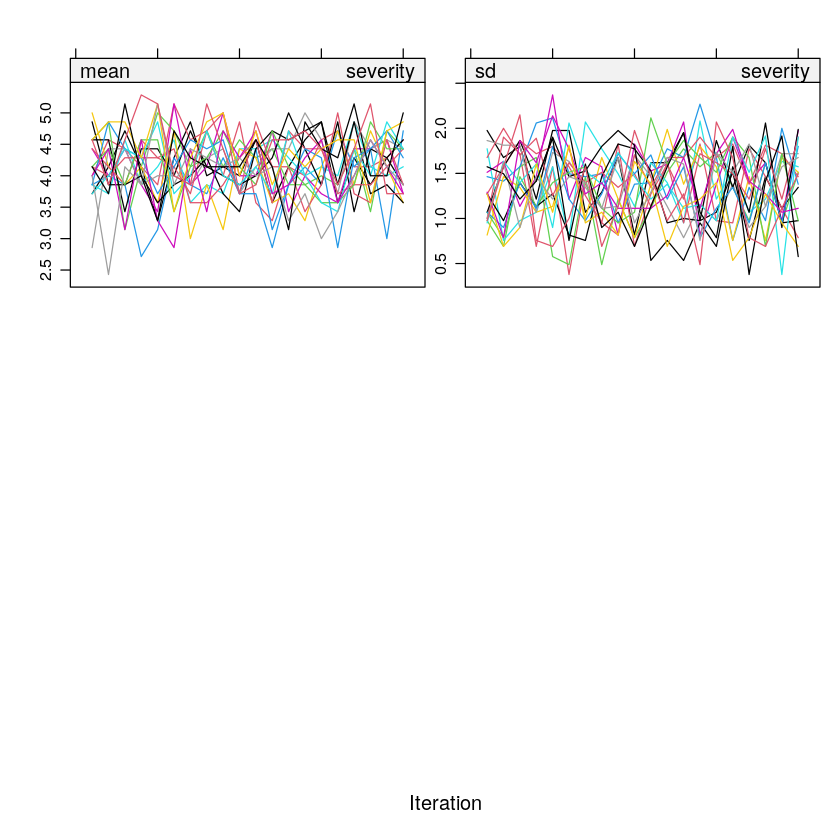

In [38]:
plot(mi_female_data)

In [39]:
mi_model = build_linear_model(mi_female_data)
summary(pool(mi_model))

term,estimate,std.error,statistic,df,p.value
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.342249166,0.408305696,0.838217956,79.93465,4.044078e-01
phydisab,0.119479245,0.035731394,3.343817083,74.27308,1.297277e-03
psydisab,0.317735276,0.034151103,9.303807035,112.45869,1.332268e-15
severity.L,0.122072555,0.192843689,0.633012964,90.96191,5.283134e-01
severity.Q,0.320676583,0.164491479,1.949502708,111.83883,5.373906e-02
severity.C,-0.001115151,0.178568144,-0.006244963,76.55672,9.950335e-01
severity^4,-0.179363881,0.159162358,-1.126923998,111.48032,2.621945e-01
severity^5,0.093260063,0.142330661,0.655235227,110.29991,5.136806e-01
age,-0.022360544,0.005311047,-4.210194880,82.03194,6.495451e-05


#### Maximum Likelihood Estimation

In [40]:
em_results = em(raw_female_data,
    cols=c('depress','phydisab','psydisab','severity','age'))
em_results

1.0000000,0.5144847,0.72756005,0.27905289,-0.17027869
0.5144847,1.0000000,0.55766238,0.33511562,0.21882864
0.7275600,0.5576624,1.00000000,0.26557066,0.04810189
0.2790529,0.3351156,0.26557066,1.00000000,-0.02467314
-0.1702787,0.2188286,0.04810189,-0.02467314,1.00000000


### Results
#### Listwise Deletion

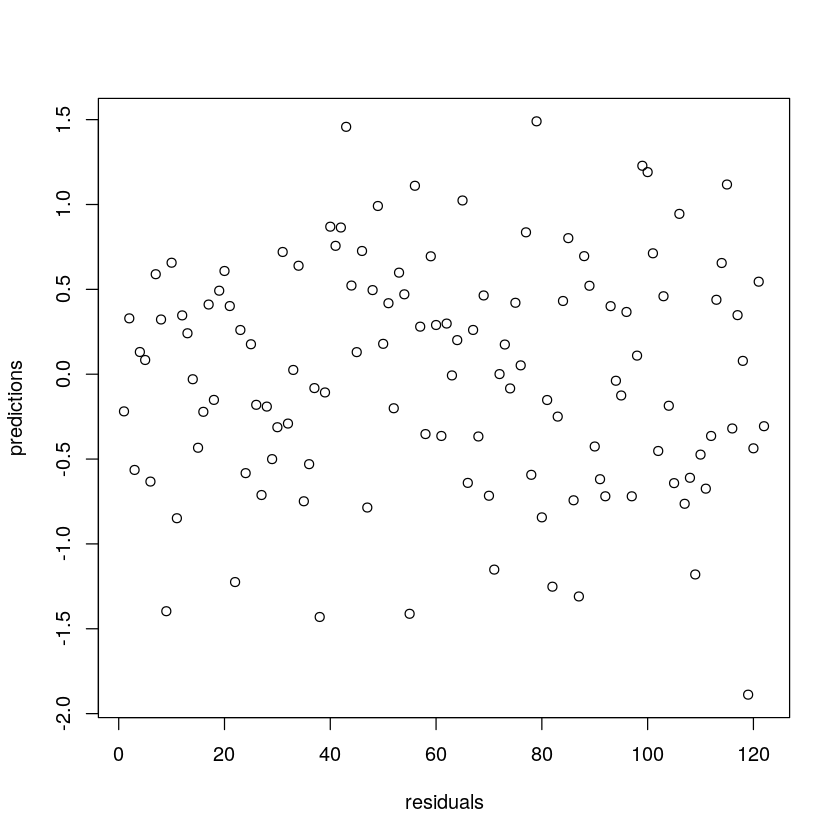

In [41]:
plot_residuals(complete_case_model)

#### Multiple Imputation

In [42]:
pool.r.squared(mi_model,adjusted=TRUE)

,est,lo 95,hi 95,fmi
adj R^2,0.6204457,0.5069345,0.7144981,0.2898239


In [43]:
tidy(pool(mi_model),conf.int=TRUE)

term,estimate,std.error,statistic,p.value,conf.low,conf.high,b,df,dfcom,fmi,lambda,m,riv,ubar
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
(Intercept),0.342249166,0.408305696,0.838217956,4.044078e-01,-0.470315262,1.15481359,4.510225e-02,79.93465,171,0.3013293,0.2840643,20,0.3967734,1.193562e-01
phydisab,0.119479245,0.035731394,3.343817083,1.297277e-03,0.048287238,0.19067125,3.723820e-04,74.27308,171,0.3242072,0.3062514,20,0.4414444,8.857314e-04
psydisab,0.317735276,0.034151103,9.303807035,1.332268e-15,0.250072256,0.38539830,1.988259e-04,112.45869,171,0.1932214,0.1789999,20,0.2180266,9.575307e-04
severity.L,0.122072555,0.192843689,0.633012964,5.283134e-01,-0.260989904,0.50513501,8.676091e-03,90.96191,171,0.2610352,0.2449641,20,0.3244404,2.807879e-02
severity.Q,0.320676583,0.164491479,1.949502708,5.373906e-02,-0.005247325,0.64660049,4.658444e-03,111.83883,171,0.1950444,0.1807771,20,0.2206690,2.216608e-02
severity.C,-0.001115151,0.178568144,-0.006244963,9.950335e-01,-0.356722613,0.35449231,9.022393e-03,76.55672,171,0.3147707,0.2971003,20,0.4226781,2.241307e-02
severity^4,-0.179363881,0.159162358,-1.126923998,2.621945e-01,-0.494739746,0.13601198,4.386346e-03,111.48032,171,0.1961014,0.1818074,20,0.2222061,2.072699e-02
severity^5,0.093260063,0.142330661,0.655235227,5.136806e-01,-0.188797371,0.37531750,3.573372e-03,110.29991,171,0.1995955,0.1852126,20,0.2273140,1.650598e-02
age,-0.022360544,0.005311047,-4.210194880,6.495451e-05,-0.032925847,-0.01179524,7.421064e-06,82.03194,171,0.2932686,0.2762455,20,0.3816839,2.041511e-05


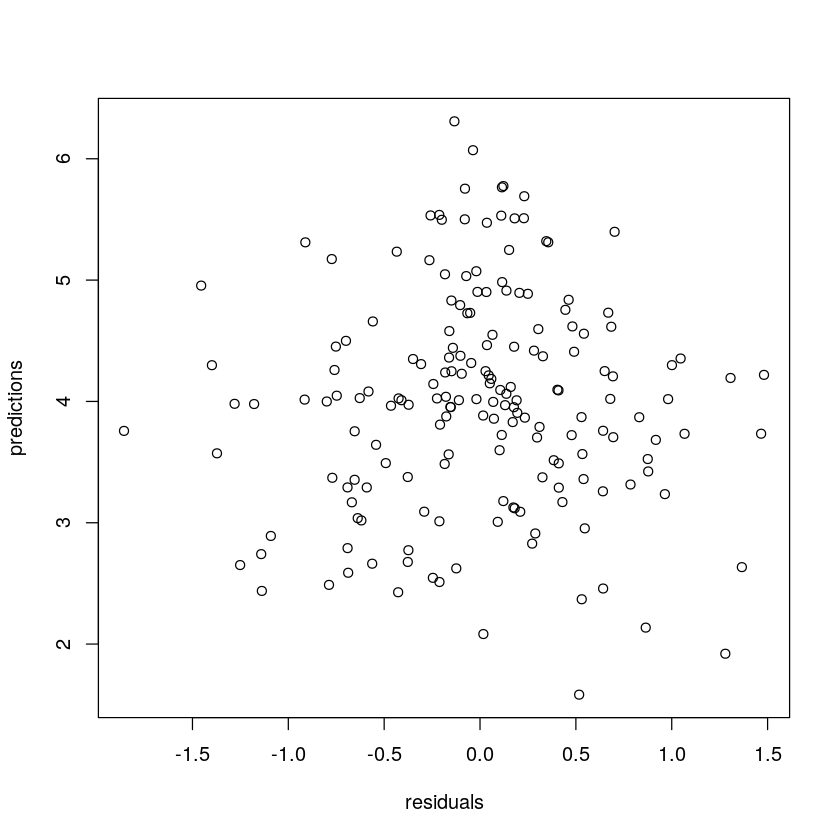

In [44]:
plot_residuals(mi_model, multiple_datasets=TRUE)

#### Maximum Likelihood Estimation

In [46]:
em_model_coeffs = coeff_em(raw_female_data, em_results, 1,
    predictor_cols=c(2,3,4,5), offset=1)
em_model_coeffs

,coeffs,std_err
,<dbl>,<dbl>
X.Intercept.,0.27436337,0.11883774
psydisab,0.10461925,0.04930481
severity,0.32430365,0.07215827
age,0.02935823,0.03666557
NA.,-0.02258802,0.01031120


In [ ]:
em_model_predictions = em_model_coeffs$coeffs[1] +
    em_model_coeffs$coeffs[2]*raw_female_data$phydisab +
    em_model_coeffs$coeffs[3]*raw_female_data$psydisab
em_model_residuals = em_model_predictions - raw_female_data$depress

plot(em_model_residuals,em_model_predictions,
     xlab='residuals',ylab='predictions')

## ## Men Only

In [ ]:
pairs.panels(raw_male_data,ellipses=FALSE)

### Model Building
#### Listwise Deletion

In [ ]:
complete_case_male_data = listwise_deletion(raw_male_data)
summary(complete_case_male_data)

In [ ]:
complete_case_model = build_linear_model(complete_case_male_data)
summary(complete_case_model)

#### Multiple Imputation

In [ ]:
mi_male_data = mice(raw_male_data, m=num_imputed_datasets, maxit=20, seed=664,
    defaultMethod=c('norm.nob','logreg','lda','polr'))

In [ ]:
summarize_pooled_results(mi_male_data, precision=5)

In [ ]:
densityplot(mi_male_data)

In [ ]:
plot(mi_male_data)

In [ ]:
mi_model = build_linear_model(mi_male_data)
summary(pool(mi_model))

#### Maximum Likelihood Estimation

In [ ]:
em_results = em(raw_male_data,
    cols=c('depress','phydisab','psydisab','severity','age'))
em_results

### Results
#### Listwise Deletion

In [ ]:
plot_residuals(complete_case_model)

#### Multiple Imputation

In [ ]:
pool.r.squared(mi_model,adjusted=TRUE)

In [ ]:
tidy(pool(mi_model),conf.int=TRUE)

In [ ]:
plot_residuals(mi_model, multiple_datasets=TRUE)

#### Maximum Likelihood Estimation

In [ ]:
em_model_coeffs = coeff_em(raw_male_data, em_results, 1, predictor_cols=c(2,3),offset=1)
em_model_coeffs

In [ ]:
em_model_predictions = em_model_coeffs$coeffs[1] +
    em_model_coeffs$coeffs[2]*raw_male_data$phydisab +
    em_model_coeffs$coeffs[3]*raw_male_data$psydisab
em_model_residuals = em_model_predictions - raw_male_data$depress

plot(em_model_residuals,em_model_predictions,
     xlab='residuals',ylab='predictions')